## Observations and Insights 

In [43]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data= pd.merge(study_results, mouse_metadata, how="outer", on="Mouse ID")
# Display the data table for preview
combined_data.tail()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17
1892,m601,45,28.430964,1,Capomulin,Male,22,17


In [44]:
# Checking the number of mice.
num_mice=combined_data["Mouse ID"].count()
pd.DataFrame({"Number of Mice":[num_mice]})


,Number of Mice
0,1893


In [45]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint
duplicate_mice = combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
pd.DataFrame(duplicate_mice)

,0
0,g989


In [46]:
# Optional: Get all the data for the duplicate mouse ID. 
pd.DataFrame(duplicate_mice)


,0
0,g989


In [47]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df=combined_data[combined_data["Mouse ID"].isin(duplicate_mice)==False]
clean_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [48]:
# Checking the number of mice in the clean DataFrame.
num_mice2=clean_df["Mouse ID"].count()
pd.DataFrame({"number of Mice":[num_mice2]})


,number of Mice
0,1880


## Summary Statistics

In [49]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
#finding mean
Tumor_mean = clean_df.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
Tumor_mean
#finding median
Tumor_median = clean_df.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
#finding variance
Tumor_variance = clean_df.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]

#finding standard deviation
Tumor_std = clean_df.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
#finding sem
Tumor_sem = clean_df.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]
#summary
summary_grouped_df = pd.DataFrame({'Mean': Tumor_mean, 'Median': Tumor_median,
                                   'Standard Deviation': Tumor_std, 'SEM': Tumor_sem})

summary_grouped_df.head()


,Mean,Median,Standard Deviation,SEM
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,8.134708,0.596466


In [50]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
Tumor_sem = clean_df.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]
summary_grouped_df = pd.DataFrame({'Mean': Tumor_mean, 'Median': Tumor_median,
                                   'Standard Deviation': Tumor_std, 'SEM': Tumor_sem})

summary_grouped_df.head()


,Mean,Median,Standard Deviation,SEM
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,8.134708,0.596466


## Bar and Pie Charts

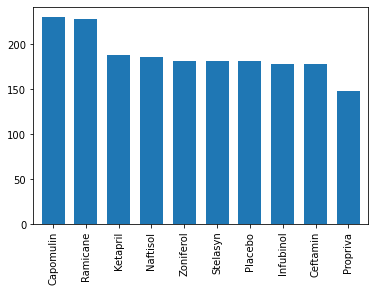

In [51]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

bar_plot = clean_df['Drug Regimen'].value_counts().plot.bar(width=0.7, zorder=3)

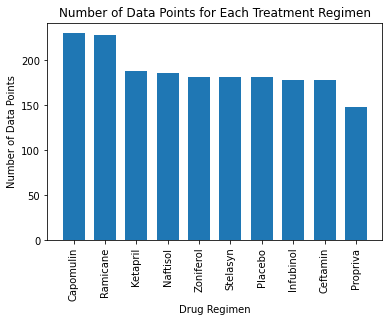

In [52]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

# Calculate the amount of data points for each drug regimen
counts = clean_df['Drug Regimen'].value_counts()

# Set the x_axis to the length of the 'counts' series
x_axis = np.arange(len(counts))

# Generate a bar blot with the length of the 'counts' series
# as the amount of values on the x axis, and the corresponding values
# in the series as the y values
plt.bar(x_axis, counts, width = 0.7, zorder=3)

# Label the tick marks according to the index values in the 'counts' series
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, counts.index.values)
# Rotate tick marks 90 degrees for visibility
plt.xticks(rotation=90)

# Set labels for axes
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.title('Number of Data Points for Each Treatment Regimen')

# Display resulting plot
plt.show()

Text(0, 0.5, '')

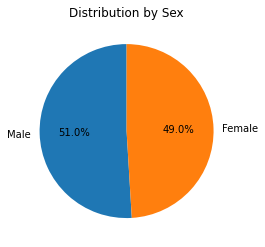

In [53]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
data = clean_df['Sex'].value_counts()

# Plot a pie chart filled with corresponding percentages and displayed vertically
pie_plot = data.plot.pie(autopct="%1.1f%%", startangle=90, title='Distribution by Sex')

# Hide the 'y' label
pie_plot.set_ylabel('')


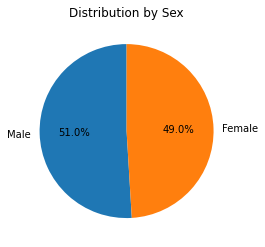

In [54]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Identify distribution of data by sex
data = clean_df['Sex'].value_counts()

# Tell matplotlib to create a pie chart filled with corresponding percentages and displayed vertically
plt.pie(data, labels=data.index.values, autopct="%1.1f%%", startangle=90)
plt.title('Distribution by Sex')

# Display resulting plot
plt.show()

## Quartiles, Outliers and Boxplots

In [55]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
required_treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
treatment_df = clean_df[clean_df["Drug Regimen"].isin(required_treatments)]
last_tp = treatment_df.groupby("Mouse ID")["Timepoint"].max()
last_tp.rename("Last Timepoint", inplace = True)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tp_merged_df = pd.merge(treatment_df, last_tp, on = "Mouse ID", how = "outer")

# Filter the df to get only the last timepoint
last_tp_filter = (tp_merged_df["Timepoint"] == tp_merged_df["Last Timepoint"])
last_tp_df = tp_merged_df[last_tp_filter].reset_index(drop = True)
last_tp_df.head()




,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Last Timepoint
0,b128,45,38.982878,2,Capomulin,Female,9,22,45
1,c326,5,36.321346,0,Infubinol,Female,18,25,5
2,c139,45,72.226731,2,Infubinol,Male,11,28,45
3,v339,5,46.250112,0,Infubinol,Male,20,26,5
4,a577,30,57.031862,2,Infubinol,Female,6,25,30


In [56]:
# Put treatments into a list for for loop (and later for plot labels)
# A list of required treatments was already created in the previous cell:
required_treatments

# Create empty list to fill with tumor vol data (for plotting)

for treatment in required_treatments:
    # add subset     
    subset = last_tp_df[last_tp_df["Drug Regimen"] == treatment]
       
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = subset["Tumor Volume (mm3)"].quantile([0.25, 0.5, 0.75])
    first_quartile = quartiles[0.25]
    second_quartile = quartiles[0.5]
    third_quartile = quartiles[0.75]
    iqr = third_quartile - first_quartile
    lower_bound = first_quartile - (1.5*iqr)
    upper_bound = third_quartile + (1.5*iqr)

    # Determine outliers using upper and lower bounds, print out outliers
    outliers_filter = ((subset["Tumor Volume (mm3)"] >= upper_bound) | (subset["Tumor Volume (mm3)"] <= lower_bound))
    outliers = subset.loc[outliers_filter, ["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
    print(f"=========== Outlier result for {treatment} ===========")
    print(outliers)
    

=========== Outlier result for Capomulin ===========
Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3)]
Index: []
=========== Outlier result for Ramicane ===========
Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3)]
Index: []
=========== Outlier result for Infubinol ===========
  Mouse ID  Timepoint  Tumor Volume (mm3)
1     c326          5           36.321346
=========== Outlier result for Ceftamin ===========
Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3)]
Index: []


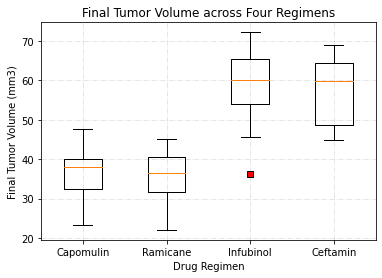

In [57]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# Create a empty dict with all four regimens and their empty lists for values
tumer_vol = {
    "Capomulin": [], 
    "Ramicane": [], 
    "Infubinol": [], 
    "Ceftamin": []
}

# Loop through four treatments in the list
for treatment in required_treatments:
    # Loop all rows in the original df
    for i in last_tp_df.index:
        # Append the required tumer volume to the responding dict[list]
        if last_tp_df.iloc[i]["Drug Regimen"] == treatment:
            tumer_vol[treatment].append(last_tp_df.iloc[i]["Tumor Volume (mm3)"])

# Plot the box chart with the previous dict's keys as label name, values as chart data
red_square = dict(markerfacecolor='r', marker='s')
fig, ax = plt.subplots()
ax.boxplot(tumer_vol.values(), flierprops = red_square)
ax.set_xticklabels(tumer_vol.keys())
ax.set_title('Final Tumor Volume across Four Regimens')
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Final Tumor Volume (mm3)')
plt.grid(linestyle='-.', alpha = 0.4)
plt.show()

## Line and Scatter Plots

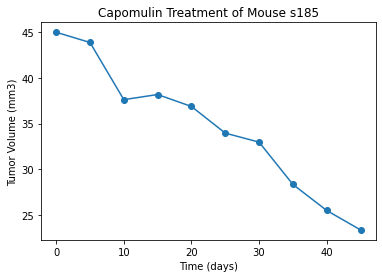

In [58]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# Identify data points of a mouse treated with Capomulin
mouse = clean_df.loc[clean_df['Mouse ID'] == 's185']

# Plot a line chart with the time values on the x-axis and the tumor volume values on the y-axis
# marker = 'o' adds circles on each data point for visibility
plt.plot(mouse['Timepoint'], mouse['Tumor Volume (mm3)'], marker = 'o')

# Add labels and title to plot
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse s185")

# Display plot
plt.show()

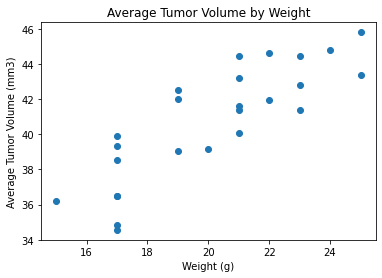

In [59]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
# Isolate cases that only use the Capomulin regimen
capomulin_df = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']

# Find average tumor volume for each mouse

avg_vol_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})

# Merge average tumor volume onto data_df and drop duplicates
avg_vol_df = pd.merge(capomulin_df, avg_vol_df, on='Mouse ID')
final_avg_vol_df = avg_vol_df[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()
final_avg_vol_df

x = final_avg_vol_df['Weight (g)']
y = final_avg_vol_df['avg_tumor_vol']

# Create a scatter plot based on new dataframe above with circle markers and listed colors
plt.scatter(x, y)

# Add labels and title to plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
# Display plot
plt.show()

## Correlation and Regression

The correlation between weight and average tumor volume
on the Capomulin regimen is 0.84.


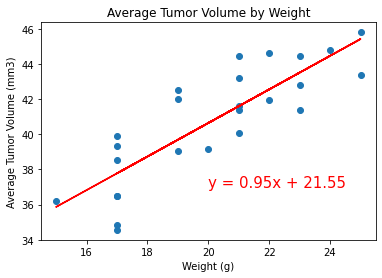

In [60]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
capomulin_df = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']
avg_vol_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})
avg_vol_df = pd.merge(capomulin_df, avg_vol_df, on='Mouse ID')
final_avg_vol_df = avg_vol_df[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()
final_avg_vol_df
x = final_avg_vol_df['Weight (g)']
y = final_avg_vol_df['avg_tumor_vol']

# Calculate the correlation coefficient between mouse weight and average tumor volume
correlation = st.pearsonr(x,y)

# Print the answer to above calculation
print(f"""The correlation between weight and average tumor volume
on the Capomulin regimen is {round(correlation[0],2)}.""")

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot linear regression on top of scatter plot
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

# Annotate linear regression
plt.annotate(line_eq,(20,37),fontsize=15,color="red")

# Add labels and title to plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
plt.show()